# Imports

In [1]:
from numpy import load # load the 2 npy files created by the process_yale_images.ipynb 
import numpy as np # to do mathematical calculation
from sklearn.model_selection import train_test_split # to split the data for training and testing
from sklearn.metrics import classification_report # to print the report of the classifier
from sklearn import metrics # to show the accuracy of the 
from sklearn.decomposition import PCA # to decrease dimension
from sklearn.model_selection import cross_val_score # K-Fold for any classifier
from matplotlib import pyplot as plt # to plot in graph
# MPL Classifier
from sklearn.neural_network import MLPClassifier 
# AdaBoosting Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Pairwise Cslassifier (one vs one classifier)
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [2]:
# load array
X = load('./yaleExtB_data.npy')
y = load('./yaleExtB_target.npy')

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=26)

In [3]:
# PCA 
nof_prin_components = 250  # PARAMETER for optimisation in expereiments
pca = PCA(n_components=nof_prin_components, whiten=True, random_state=26).fit(X_train)

# applies PCA to the train and test images to calculate the principal components
X_pca = pca.transform(X)
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)

# # Calculating explained variance ratio and cumulative explained variance ratio to find the best no of pca
# # Calculate the explained variance ratio for each component
# explained_variance_ratio = pca.explained_variance_ratio_

# # Calculate the cumulative explained variance ratio
# cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# # Print the cumulative explained variance ratio
# print("Cumulative explained variance ratio: \n", cumulative_explained_variance_ratio)

# MLP Classifier

In [4]:
# training a neural network using MLP
nohn = 400 #nof hidden neurons
# print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(nohn,), solver='sgd', activation='tanh', batch_size=250, verbose=False, 
                    early_stopping=True, random_state=26).fit(X_train_pca, y_train)

In [5]:
clf_y_pred = clf.predict(X_test_pca) # reoognises the test images 
# print(classification_report(y_test, y_pred)) # the recognition accuracy
print("Accuracy : ", metrics.accuracy_score(y_test, clf_y_pred))

Accuracy :  0.8828282828282829


In [5]:
clf_cross_val_result = cross_val_score(clf, X_pca, y, cv=5)

print("Cross Validation Scores : ", clf_cross_val_result)
print("Average Accuracy : ", np.mean(clf_cross_val_result))

Cross Validation Scores :  [0.90333333 0.92333333 0.81666667 0.88333333 0.87      ]
Average Accuracy :  0.8793333333333333


## Automation

In [6]:
mlp = MLPClassifier(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes':[(100),(200)],
    'activation':['tanh', 'relu'],
    'solver':['sgd', 'adam'],
    'alpha':[0.1, 0.5, 0.7],
    'learning_rate':['constant', 'adaptive']
}

from sklearn.model_selection import GridSearchCV

mlp_clf = GridSearchCV(mlp, parameter_space, n_jobs=1, cv=5).fit(X_train_pca, y_train)

/Users/xic/Desktop/Assignment 1(AI)/Virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xic/Desktop/Assignment 1(AI)/Virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xic/Desktop/Assignment 1(AI)/Virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xic/Desktop/Assignment 1(AI)/Virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

/Users/xic/Desktop/Assignment 1(AI)/Virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xic/Desktop/Assignment 1(AI)/Virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xic/Desktop/Assignment 1(AI)/Virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xic/Desktop/Assignment 1(AI)/Virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

# Review Results

In [ ]:
# identifying perfecdt/best hyperparameters
print("Best Parameters Found : \n", mlp_clf.best_params_)

In [ ]:
# prediction
y_true, y_pred = y_test, mlp_clf.predict(X_test_pca)

print('Results on the test set : \n', classification_report(y_true, y_pred))

# Loss Function

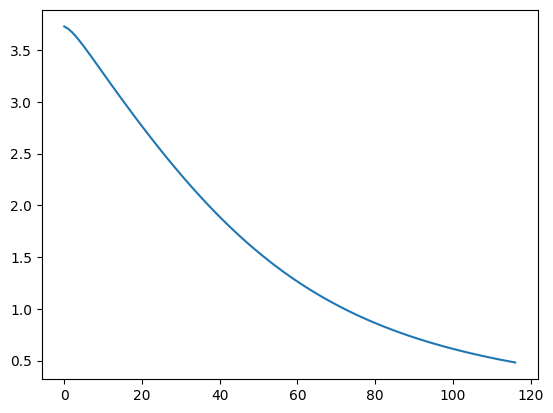

In [7]:
loss_values = clf.loss_curve_

plt.plot(loss_values)
plt.show()

# Adam Boosting Classifier

In [7]:
# training nerual nertwork using Adaboosting
adboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=200, algorithm='SAMME.R',
                            learning_rate=0.5, random_state=26).fit(X_train_pca, y_train)

In [8]:
ada_y_pred = adboost.predict(X_test_pca)
print('Accuracy : ', metrics.accuracy_score(y_test, ada_y_pred))

Accuracy :  0.5070707070707071


In [9]:
ada_cross_val_result = cross_val_score(adboost, X_pca, y, cv=5)

print("Cross Validation Scores","\t"," : ", ada_cross_val_result)
print("Average Accuracy : ", np.mean(ada_cross_val_result))

Cross Validation Scores 	  :  [0.57       0.50333333 0.48       0.50333333 0.44666667]
Average Accuracy :  0.5006666666666667


# Pairwise Classifier

In [10]:
# training a neural network using Pairwise
pair = OneVsOneClassifier(LinearSVC()).fit(X_train_pca, y_train)

In [11]:
pair_y_pred = pair.predict(X_test_pca)
print('Accuracy : ', metrics.accuracy_score(y_test, pair_y_pred))

Accuracy :  0.9494949494949495


In [12]:
pair_cross_val_result = cross_val_score(pair, X_pca, y, cv=5)

print("Cross Validation Scores : ", pair_cross_val_result)
print("Average Accuracy : ", np.mean(pair_cross_val_result))

Cross Validation Scores :  [0.98333333 0.98333333 0.94666667 0.98333333 0.96333333]
Average Accuracy :  0.9719999999999999
